In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

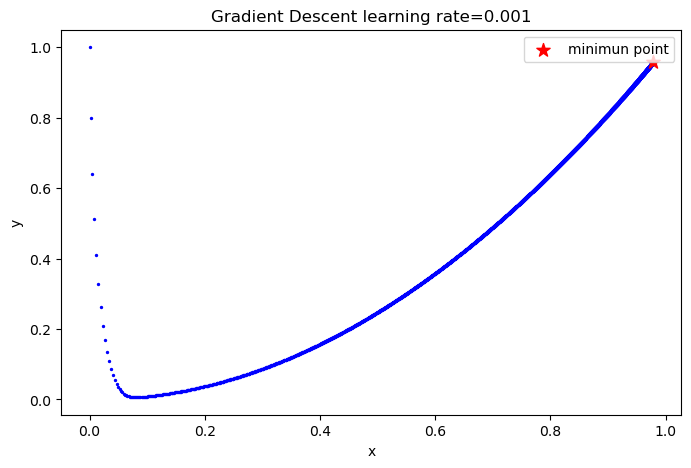

Iteration times:  6688
global minimun: [0.9785559 0.9574954]


C:\Users\12\AppData\Local\Temp\ipykernel_13844\3484940018.py:12: RuntimeWarning: overflow encountered in double_scalars
  dx = -2 * (1 - x) - 400 * x * (y - x**2)
C:\Users\12\AppData\Local\Temp\ipykernel_13844\3484940018.py:23: RuntimeWarning: invalid value encountered in subtract
  point -= learning_rate * grad


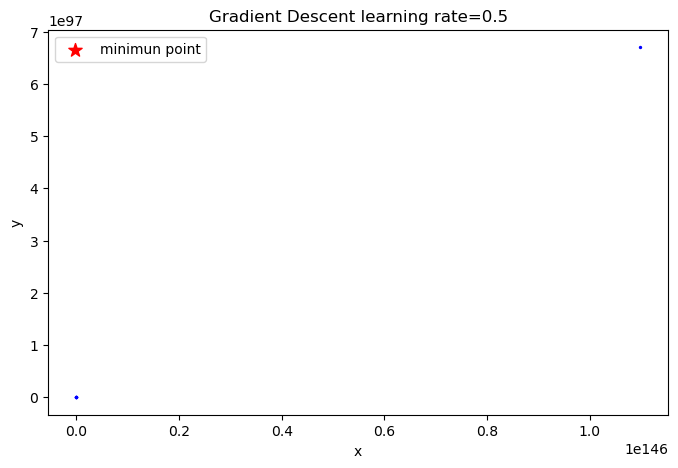

Iteration times:  80000
global minimun: [nan nan]
with learning rate = 0.5, the gradient descent cannot converge. x and y explode to infinity.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock's Valley function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# 计算 Rosenbrock's Valley function 的梯度
def rosenbrock_gradient(x, y):
    x = round(x,5)
    y = round(y,5)
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)

    return np.array([dx, dy])

def gradient_descent(learning_rate, start_point):
    point = np.array(start_point, dtype=float)  
    trajectory = [point.copy()]  
    itera = 0
    while 1:
        grad = np.round( rosenbrock_gradient(point[0], point[1]),4 )
        point -= learning_rate * grad
        if all( abs(trajectory[-1]-point)) < 0.0001:
            break
            
        elif itera == 80000:
            break
            
        trajectory.append(point.copy())
        itera +=1
        
    return point, np.array(trajectory) ,itera

learning_rate = [0.001, 0.5]
start_point = [0.0, 1.0]  

for rate in learning_rate:
    minimum_point, trajectory,iteration_times = gradient_descent(rate, start_point)
    minimum_value = rosenbrock(minimum_point[0], minimum_point[1])

    # plot
    x_trajectory = trajectory[:, 0]
    y_trajectory = trajectory[:, 1]

    plt.figure(figsize=(8, 5))

    plt.scatter(x_trajectory, y_trajectory, color='blue',s = 2)
    plt.scatter(minimum_point[0], minimum_point[1], marker='*',s = 100, color='red', label='minimun point')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent learning rate=%s'%rate)
    plt.legend()
    plt.show()
    print('Iteration times: ',iteration_times)
    print('global minimun:',minimum_point)
print('with learning rate = 0.5, the gradient descent cannot converge. x and y explode to infinity.')

(2)

In [5]:
def hessian_matrix(x,y):
    return np.array([[1200*x**2-400*y+202, -400*x],[-400*x, 200]])

def newton_method (start_point):
    point = np.array(start_point, dtype=float)  
    trajectory = [point.copy()]  
    itera = 0
    while 1:
        H = hessian_matrix(point[0], point[1])
        grad = rosenbrock_gradient(point[0], point[1])
        point -= np.linalg.inv(H) @ grad
        if all( abs(trajectory[-1]-point)) < 0.001:
            break
            
        elif itera == 10000:
            break
            
        trajectory.append(point.copy())
        itera +=1
        
    return point, np.array(trajectory) ,itera    

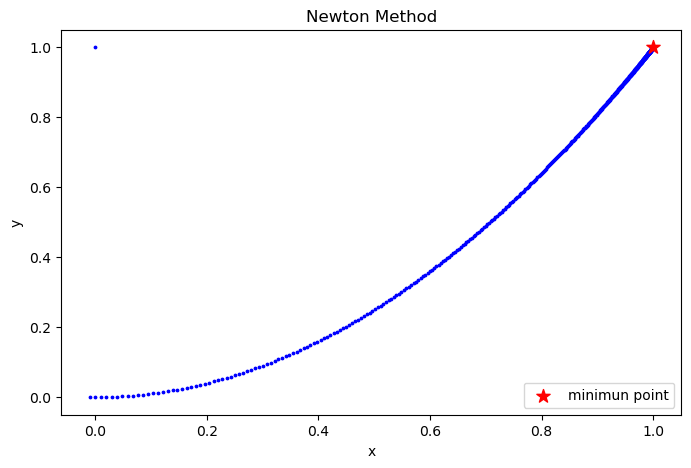

Iteration times:  1219
global minimum: [0.99999505 1.00000321]


In [9]:
minimum_point, trajectory,iteration_times = newton_method(start_point)
minimum_value = rosenbrock(minimum_point[0], minimum_point[1])

# plot
x_trajectory = trajectory[:, 0]
y_trajectory = trajectory[:, 1]

plt.figure(figsize=(8, 5))

plt.scatter(x_trajectory, y_trajectory, s = 3, color='blue')
plt.scatter(minimum_point[0], minimum_point[1], marker='*',s = 100, color='red', label='minimun point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton Method')
plt.legend()
plt.show()
print('Iteration times: ',iteration_times)
print('global minimum:',minimum_point)